In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class DrawerCustom(Drawer):
    def draw_frame_at_phase(self, phase):
        I_0 = 1
        I_1 = 1
        I_2 = 1

        print(phase)

        dx = 5 * (phase % (2 * np.pi))
        for x in range(self.canvas.shape[0]):
            for y in range(self.canvas.shape[1]):
                self.canvas[x,y] = 0.1 * (I_0 + I_1 * (x-dx) + I_2 * (x-dx)**2)

-0.32139055279690976
-0.16069527639845488
0.0
0.16069527639845488
0.32139055279690976
0.4820858291953646
0.6427811055938195
0.8034763819922744
0.9641716583907293
1.1248669347891842
1.285562211187639
1.4462574875860938
1.6069527639845487
1.767648040383004
1.9283433167814588
2.0890385931799136
2.2497338695783684
2.4104291459768232
2.571124422375278
2.731819698773733
2.8925149751721877
3.053210251570643
3.213905527969098
3.3746008043675526
3.5352960807660074
3.6959913571644627
3.8566866335629175
4.017381909961372
4.178077186359827
4.338772462758282
4.499467739156737
4.660163015555192
4.8208582919536465
4.981553568352101
5.142248844750556
5.302944121149011
5.463639397547466
5.624334673945921
5.785029950344375
5.94572522674283
6.106420503141285
6.267115779539741
6.427811055938196
6.58850633233665
0.0
0.16069527639845488
0.32139055279690976
0.48208582919536463
0.6427811055938195
0.8034763819922743
0.9641716583907293
1.1248669347891842
1.285562211187639
1.4462574875860938
1.6069527639845487
1

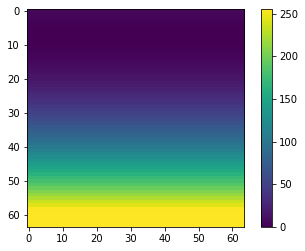

In [4]:
v = DrawerCustom(5, 39.1, (64, 64))
v.generate_reference_sequence()
v.generate_sequence()

plt.imshow(v.sequence[10])
plt.colorbar()
plt.show()

import tifffile as tf
tf.imwrite("test.tif", v.sequence)

In [5]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False, drift_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True, drift_correct = False)

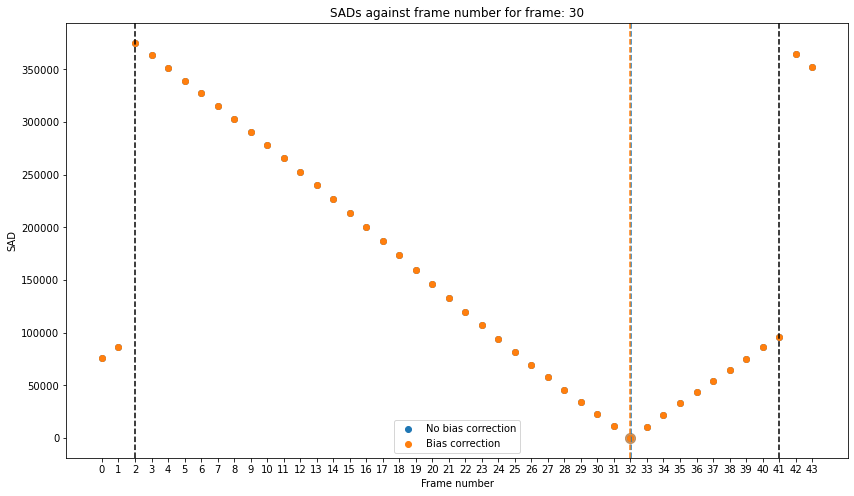

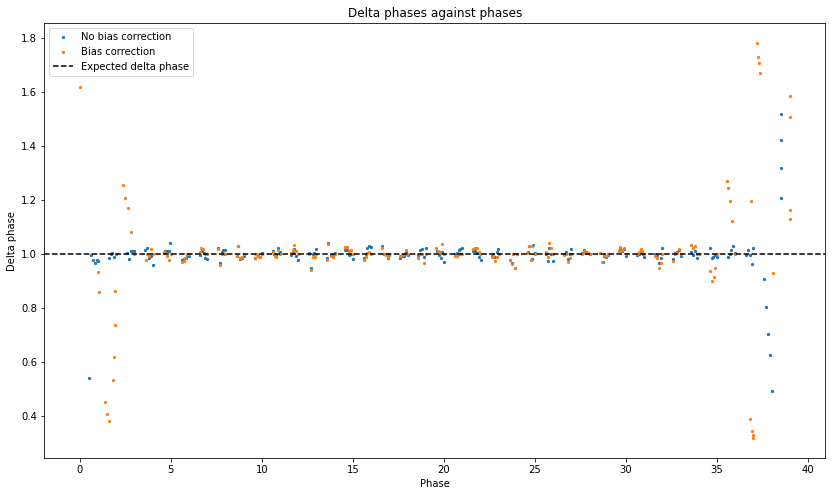

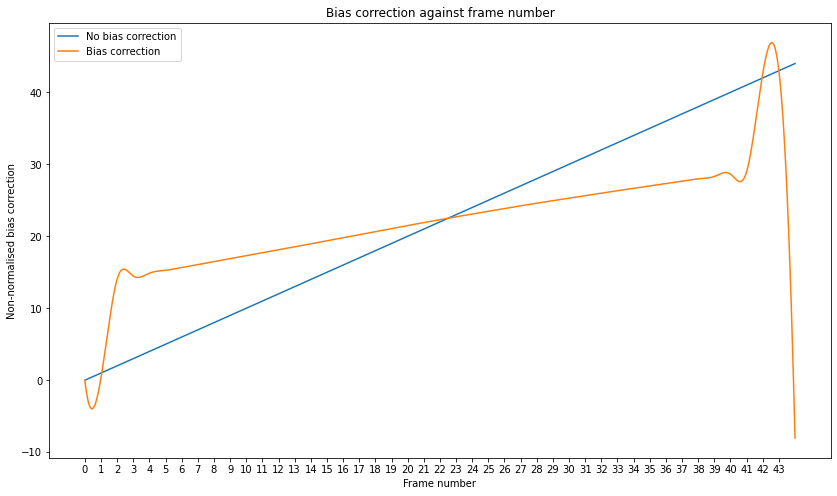

In [6]:
sogp = BOGP([sog, sog_bc], ["No bias correction", "Bias correction"])
sogp.plot_sads(30)
sogp.plot_delta_phases_phases()
sogp.plot_bias_correction()